# 社会科学中的机器学习应用

**主要内容**

- 机器学习与社会科学
- 统计建模视角下两者的分歧
- 基于树的方法
    - 案例：旧金山和纽约的房屋分类（决策树）
- 集成方法

## 机器学习与社会科学

随着大数据和机器学习在工商业领域的流行，越来越多的社会科学家也开始拥抱这种潮流。

- 更多的相关课程
- 更多的研究成果

## 统计建模视角下两者的分歧

<br>

**解释还是预测，这是个问题**

<br>

假设$Y$和$X=\left(X_{1}, X_{2}, \ldots, X_{p}\right)$有一定关系，可以写成一般形式

$$Y=f(X)+\epsilon$$

这里$f$是固定但未知的，$\epsilon$是随机误差项，与$X$独立，且均值为$0$。

### 出于何种理由估计$f$

估计$f$的主要原因有两个

- 预测（prediction）
- 推断（inference）

**预测**

一般而言，可以通过下式来预测$Y$

$$\hat{Y}=\hat{f}(X)$$

这里$\hat{f}$是黑箱（black box）。$\hat{Y}$作为响应变量的预测。

<br>

**推断**

推断的目标是想要明白$X$和$Y$的关系

> 根据分析的目标是预测、推断还是两者兼具，估计$f$所采用的方法可能是不同的

### 如何估计$f$

**参数方法**

基于模型的方法统称为参数法，它把估计$f$的问题简化到估计一组参数。参数法的缺陷是选定的模型并非与真正的$f$在形式上是一致的。假如我们选择的模型与真实的$f$差距太大，这样估计的$f$效果会很差。这样问题的解决思路是尝试通过选择光滑模型拟合很多不同形式的函数$f$。但拟合光滑度更强的模型需要更多的参数估计，且容易导致过拟合（overfitting）现象的出现。

<br>

**非参数方法**

非参数方法不需要对函数$f$的形式事先做明确的假设。它的优点就在于：不限定函数$f$的具体形式。但非参数方法的弱点是无法将估计$f$的问题简化到仅仅对少数参数进行估计的问题。

<br>

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/jkuDq0BY/02.jpg?v=4651674dbb18599068f0a5010495e1fd" width = 60% height = 60% />

## 基于树的方法

### 原理

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/E0ur0Kqp/classificationtree_example.png?v=060d3f5064fac68f3d223f865fad723e" width = 70% height = 70% />

<br>

基于树的方法根据分层（stratifying）和分割（segmenting）的方式将预测变量空间划分为一系列简单区域。对某个给定待观测的观测值，用它所属区域中训练集的平均值或众数对其进行预测。由于划分预测变量空间的分裂规则可以被概括为一棵树，所以此类方法被称为**决策树(decition tree)**方法。

与自然界中的树类似，最上层的是根结点（root node），最底层的是树的终端结点（terminal node）或树叶（leaf）。沿着树将预测变量空间分开的点称为内部结点（internal node）。树内部各个结点的连接部分称为分支（branch）。

<img src="https://bradleyboehmke.github.io/HOML/images/decision-tree-terminology.png" width = 70% height = 70% />

对于机器学习常用的分类数据集iris

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width = 70% height = 70% />

决策树模型可以表示为

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/7Ku8YKWq/p03.jpg?v=b16138f672fb39003b5bbe67686af433" width = 70% height = 70% />

### 回归树

建立回归树的过程大致可以分为两步。

- 将预测变量空间（即$X_{1}, X_{2}, \ldots, X_{p}$的可能取值构成的集合）分割成$J$个互不重叠的区域$R_{1}, R_{2}, \ldots, R_{J}$。
- 对落入区域$R_{J}$的每个观测值作同样的预测，预测值等于$R_{J}$上训练集的响应值的简单算术平均。

<br>

> 问题：如何构建区域$R_{1}, R_{2}, \ldots, R_{J}$？

预测变量空间划分为高维矩形，或称盒子。划分区域的目标是找到使模型的残差平方和$RSS$最小的矩形区域$R_{1}, R_{2}, \ldots, R_{J}$。$RSS$的定义为

$$
\sum_{j=1}^{J} \sum_{i \in R_{j}}\left(y_{i}-\hat{y}_{R_{j}}\right)^{2}
$$

上式中的$\hat{y}_{R_{j}}$是第$j$个矩形区域中训练集的平均响应值。遗憾的是，要想考虑将特征空间所有的划分可能性，在计算上是不可行的。因此一般采用自上而下（top-down）、贪婪（greedy）方法：递归二叉分裂（recursive binary splitting）。

在执行递归二叉分裂时，先选择预测变量$X_{j}$和分割点$s$，将预测变量空间分为两个区域$\left\{X \mid X_{j}<s\right\}$和$\left\{X \mid X_{j} \geq s\right\}$，使$RSS$尽可能地减少。更正式的，对$j$和$s$，定义一对半平面：

$$
R_{1}(j, s)=\left\{X \mid X_{j}<s\right\} \text { and } R_{2}(j, s)=\left\{X \mid X_{j} \geq s\right\}
$$

寻找$j$和$s$，使得下式取得最小值

$$
\sum_{i: x_{i} \in R_{1}(j, s)}\left(y_{i}-\hat{y}_{R_{1}}\right)^{2}+\sum_{i: x_{i} \in R_{2}(j, s)}\left(y_{i}-\hat{y}_{R_{2}}\right)^{2}
$$

重复上述步骤，继续寻找分割数据集的最优预测变量和最优分割点，使随之产生的区域中的$RSS$达到最小。这一过程不断持续，直到符合某个停止准则。

毫无疑问，某个变量可以在树划分中出现多次。例如假设数据生成服从如下正态分布，$Y_{i} \sim N\left(\sin \left(X_{i}\right), \sigma^{2}\right)$，一棵简单的回归树可以用下图表示

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/12urX2vy/p01.jpg?v=a6aded999f14f630f482d18d5b434496" width = 80% height = 80% />

或者构建一棵多层的树

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/xQuAB1jJ/p02.jpg?v=1e809d75b629b857c5ec1cb1c167c608" width = 80% height = 80% />

#### 树的剪枝

上述的过程可能会导致树的过拟合。一种可能的解决方法是：仅当分裂使残差平方和$RSS$的减小量超过某阈值时才分裂树结点。这种策略能产生较小的树，但可能产生过于短视的问题。

更好的策略是生成一棵很大的树，然后通过剪枝（prune）得到子树（sub-tree）。直观上看，剪枝的目标是选出使测试集预测误差最小的子树。但对每一棵都用交叉验证来估计误差太过复杂。

因此常用代价复杂性剪枝的方法，它不是考虑每一棵可能的子树，而是通过调整参数$\alpha$在子树的复杂性和训练数据的契合度之间进行权衡。

$$
\sum_{m=1}^{|T|} \sum_{i: x_{i} \in R_{m}}\left(y_{i}-\hat{y}_{R_{m}}\right)^{2}+\alpha|T|
$$

这里的$|T|$表述树$T$的终端结点树。

### 分类树

分类树是用于预测定性变量而非定理变量。它同样采用递归二叉分裂，替代$RSS$的指标可以使用分类错误率。

$$
E=1-\max _{k}\left(\hat{p}_{m k}\right)
$$

其中$\hat{p}_{m k}$代表第$m$个区域的训练集中第$k$类所占比例。但实践中，它在构建树时不够敏感，往往使用基尼系数（Gini index）

$$
G=\sum_{k=1}^{K} \hat{p}_{m k}\left(1-\hat{p}_{m k}\right)=1-\sum_{k=1}^{K}\hat{p}_{m k}^{2}
$$

或互熵（cross-entropy）

$$
D=-\sum_{k=1}^{K} \hat{p}_{m k} \log_{2} \hat{p}_{m k}
$$

可见，它们都是结点纯度（purity）的衡量指标，若$\hat{p}_{m k}$取值接近$0$或$1$，它较小，就意味着某个结点包含的观测值几乎都来自于同一类别。

由此带来的信息增益为

$$\operatorname{Gain}(S, A) \equiv \operatorname{D}(S)-\underset{v \in \operatorname{Values}(A)}{\sum} \frac{\left|S_{v}\right|}{|S|} \operatorname{D}\left(S_{v}\right)$$

**案例：请问应该选择哪个结点进行二叉分裂？**

结点一

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/P8uyA6zB/decision_tree04.png?v=0ace6e62d28f86440941ccb44a178712" width = 40% height = 40% />

结点二

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/kpuwj4rX/decision_tree05.png?v=655db848409079cbd666b7d06c6cb72bg" width = 40% height = 40% />

In [19]:
# node entropy
import numpy as np

p = [1/2, 1/2]
- sum(p * np.log2(p))

0.5

- 写成函数

In [25]:
import copy
import numpy as np

# to define single node cross entropy
def single_node_cross_entropy(p):
    p0 = copy.copy(p)
    while 0 in p0: p0.pop(p0.index(0))
    return -sum(p0 * np.log2(p0))

# to define multiple nodes cross entropy
def multiple_nodes_cross_entropy(ps, weights):
    return sum([weights[i] * single_node_cross_entropy(ps[i]) for i in range(len(ps))])

In [30]:
# to calculation
# for node one
node_one_entropy = multiple_nodes_cross_entropy([[6/12, 6/12], [4/8, 4/8]], [12/20, 8/20])

# for node two
node_two_entropy = multiple_nodes_cross_entropy([[0.25, 0.75], [0.75, 0.25], [0, 1]], [1/5, 3/5, 1/5])

print(f"node 1's entropy: {node_one_entropy:.2f}\nnode 2's entropy: {node_two_entropy:.2f}")

node 1's entropy: 1.00
node 2's entropy: 0.65


结论：毫无疑问应该选择第二个结点。每个结点都选择信息增益最大的属性进行叉裂。

### 案例：旧金山和纽约的房屋分类（决策树）

点击[此处](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)查看案例

- 导入数据

In [4]:
import pandas as pd

data = pd.read_csv("https://p193.p3.n0.cdn.getcloudapp.com/items/qGulPAPB/data.csv?v=1bfb05ac0de770d0127996d6954141b2")
data

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10
...,...,...,...,...,...,...,...,...
487,1,5.0,2.5,1800000,1890,3073,586,76
488,1,2.0,1.0,695000,1923,1045,665,106
489,1,3.0,2.0,1650000,1922,1483,1113,106
490,1,1.0,1.0,649000,1983,850,764,163


- 提取X和y变量

In [5]:
target_name = "in_sf"
feature_names = ["beds", "bath", "price", "year_built", "sqft", "price_per_sqft", "elevation"]

y = data.loc[:, target_name]
X = data.loc[:, feature_names]

- Python机器学习库 —— [scikit learn](https://scikit-learn.org/stable/)

<img src="https://p193.p3.n0.cdn.getcloudapp.com/items/Z4uqlZA1/p02.jpg?v=6b699a3a3a7ef48aee31b9a52a2b4176" width = 80% height = 80% />

- 划分训练和测试数据集

In [31]:
from sklearn.model_selection import train_test_split

seed = 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

- 构建决策树

In [34]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2, random_state=seed)
clf = clf.fit(X_train, y_train)

- 决策树图

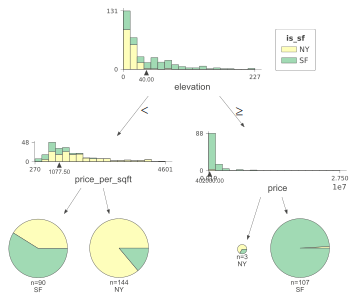

In [35]:
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

viz = dtreeviz(clf,
               X_train,
               y_train,
               target_name='is_sf',  # this name will be displayed at the leaf node
               feature_names=feature_names,
               class_names=["NY", "SF"]
              )
viz

In [36]:
viz.view()

- 预测

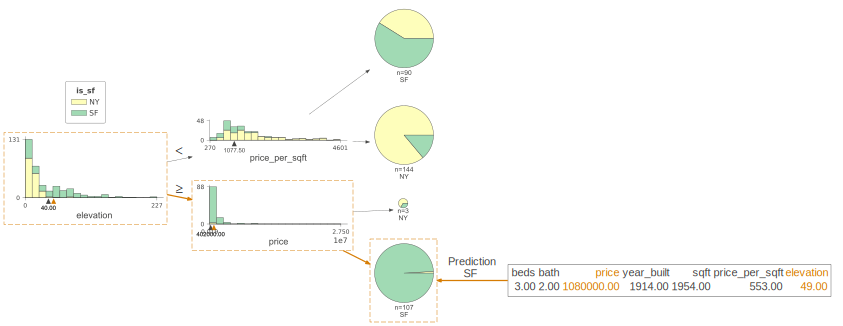

In [40]:
viz = dtreeviz(clf,
               X_train,
               y_train,
               target_name='is_sf',  # this name will be displayed at the leaf node
               feature_names=feature_names,
               class_names=["NY", "SF"],
               orientation='LR',
               X=X_test.iloc[1,:]
              )
viz

In [39]:
viz.view()

- 预测准确率

In [11]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.8040540540540541


- 剪枝

scikit-learn库提供了cost_complexity_pruning_path函数，返回剪枝过程中的$\alpha$以及总的树叶不纯度。

In [12]:
clf = tree.DecisionTreeClassifier(random_state=seed)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

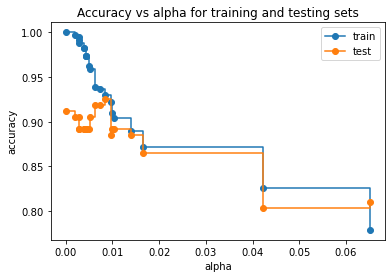

In [13]:
import matplotlib.pyplot as plt

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=seed, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

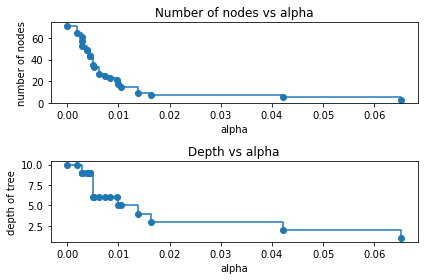

In [14]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- 报告剪枝结果

In [15]:
i = test_scores.index(max(test_scores))
print(f"Alpha: {ccp_alphas[i]:.4f}\nNumber of nodes: {node_counts[i]}\nDepth of tree: {depth[i]}\nmax accuracy score: {test_scores[i]:.4f}")

Alpha: 0.0083
Number of nodes: 23
Depth of tree: 6
max accuracy score: 0.9257


## 集成方法

集成学习是一种机器学习范式。在集成学习中，我们会训练多个模型（通常称为「弱学习器」）解决相同的问题，并将它们结合起来以获得更好的结果。最重要的假设是：当弱模型被正确组合时，我们可以得到更精确和/或更稳健的模型。

#### 随机森林（Random Forest）

树是高方差函数估计器，它越稠密，方差就越大。早期的分裂决定了树的结构。此外，稠密的树木将训练数据局部化到目标点周围相对较小的区域，这表明它具有低偏差。随机森林的想法是种植许多茂密的树，并通过均值来减弱高方差。为了从平均中收益，各棵树不应该太相关，所以要在构建中注入随机性。

随机森林与装袋法类似，需要对自主抽样训练集建立一系列决策树。不过，在建立这些决策树时，每考虑树上的一个分裂点，都要从全部的$p$个预测变量中选出一个包含$m$个预测变量的随机样本作为候选变量。在每个分裂点处都重新进行抽样，选出$m$个预测变量，通常$m \approx \sqrt{p}$。

为什么这么做呢？假设数据集中有一个很强的预测变量和其他一些中等强度的预测变量，那么在装袋法树的集合中，大多（甚至可能所有）树都会将最强的预测变量用于顶部分裂点，这会导致所有的装袋法树看起来都很相似，因为它们的预测变量是高度相关的，因此平均化所带来的方差减少程度很小。随机森林通过强迫每个分裂点仅考虑预测变量的一个子集，客服了这一困难。这一过程可以被认为是对树去相关化，由此得到的树的平均值有更小的方差，因而树的可信度也更高。

#### 梯度提升法（Gradient Boosting）

提升法是机器学习中最强有力的学习方法之一，它可以应用于分类问题，也适用于回归方法。它的基本思想是通过组合多个“弱”分类器从而得到一个强分类器。

> 弱分类器就是指错误率略高于随机猜测的分类器。原型弱分类器是决策树。

提升法是一种舒缓的训练模型方法。

- 决策树、随机森林以及梯度提升法的交叉验证

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=5)
print(f"Decision Tree: {scores.mean():.4f}")

clf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
print(f"Random Forest: {scores.mean():.4f}")

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.4)
scores = cross_val_score(clf, X, y, cv=5)
print(f"Gradient Boosting: {scores.mean():.4f}")

Decision Tree: 0.8231
Random Forest: 0.8659
Gradient Boosting: 0.8700
